# 2. Exploratory Data Analysis (EDA)

**Author**: Faith

This notebook performs exploratory and statistical analysis on the cleaned Mental Health in Tech dataset. The goal is to understand the distribution of variables and uncover initial patterns related to treatment-seeking behavior.


In [3]:
# 📥 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [4]:
# 📂 Step 2: Load the Cleaned Dataset
df = pd.read_csv('../data/final/survey_cleaned.csv')
df.head()


,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,Unknown,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,Unknown,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,Unknown,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


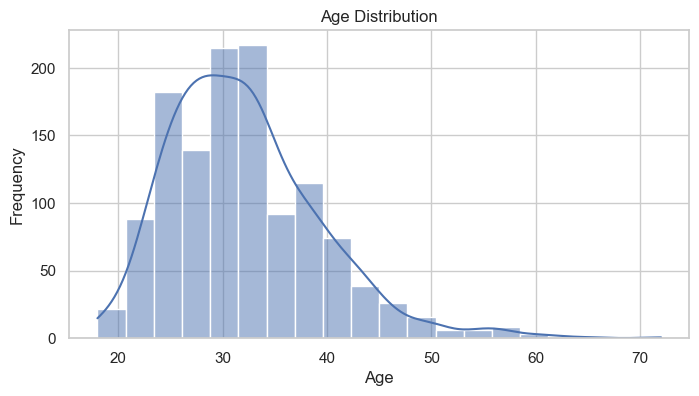

In [5]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Standardize gender values
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'cis-woman']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)


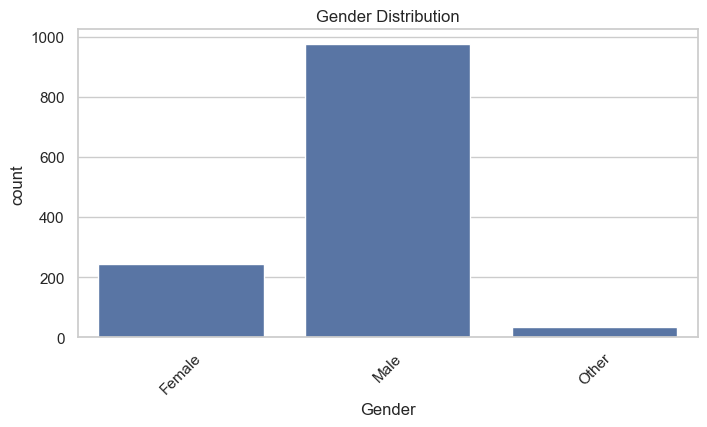

In [8]:
# Gender Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()


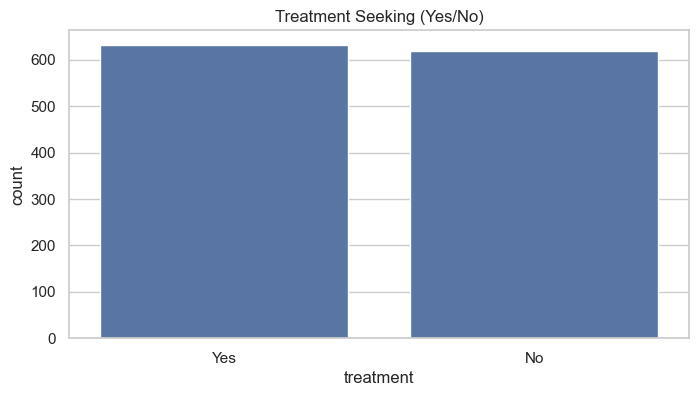

In [9]:
# Treatment Seeking Count
plt.figure(figsize=(8, 4))
sns.countplot(x='treatment', data=df)
plt.title('Treatment Seeking (Yes/No)')
plt.show()


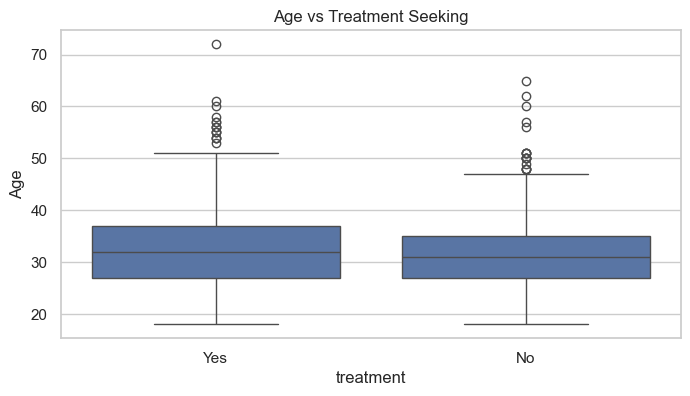

In [10]:
# Age vs Treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Age vs Treatment Seeking')
plt.show()


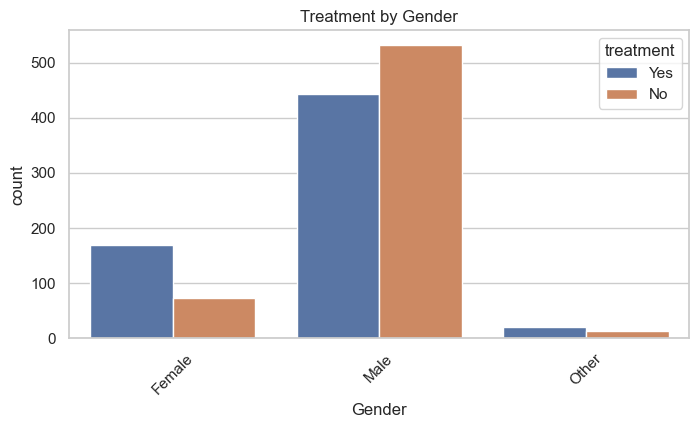

In [11]:
# Gender vs Treatment
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Treatment by Gender')
plt.xticks(rotation=45)
plt.show()


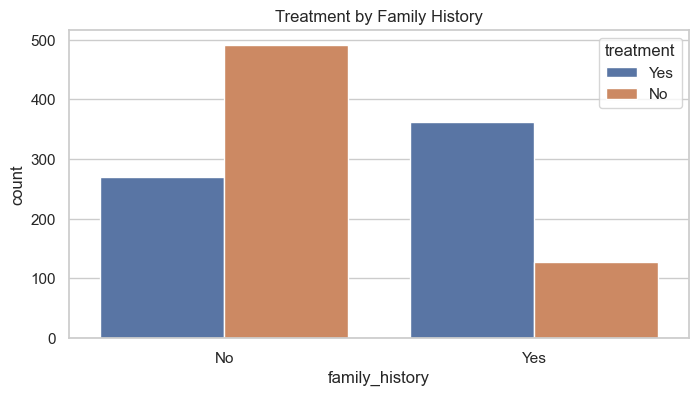

In [12]:
# Family History vs Treatment
plt.figure(figsize=(8, 4))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Treatment by Family History')
plt.show()
